In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import IPython

from PIL import Image

In [2]:
def gray_scale_to_binary(gray):
    img_temp = gray
    for i, arr in enumerate(img_temp):
        img_temp[i] = [1 if val <= 128 else 0 for val in arr]
    return img_temp

def display_image(img_array):
    plt.imshow(1 - img_array, cmap='gray')
    plt.axis('off')
    plt.show()
    
def display_image255(img_array):
    plt.imshow(255 - img_array, cmap='gray')
    plt.axis('off')
    plt.show()

T1 = np.array((
 [1, 1, 1],
 [0, 1, 0],
 [-1, -1, -1]), dtype="int")

T2 = np.rot90(T1)

T3 = np.rot90(T2)

T4 = np.rot90(T3)

T5 = np.array((
 [0, 1, 0],
 [-1, 1, 1],
 [-1, -1, 0]), dtype="int")

T6 = np.rot90(T5)

T7 = np.rot90(T6)

T8 = np.rot90(T7)

def add_border(matrix):
    rows, cols = matrix.shape
    new_matrix = np.zeros((rows + 4, cols + 4), dtype=matrix.dtype)
    new_matrix[2:rows+2, 2:cols+2] = matrix
    return new_matrix

def remove_border(matrix):
    rows, cols = matrix.shape
    new_matrix = matrix[2:rows-2, 2:cols-2]
    return new_matrix

def thinning(X, T):
    hit_and_miss = np.array(cv.morphologyEx(X * 255, cv.MORPH_HITMISS, T) / 255, np.uint8)
    return cv.bitwise_and(X, 1 - hit_and_miss)

def psi(X):
    X = add_border(X)
    return remove_border(thinning(thinning(thinning(thinning(thinning(thinning(thinning(thinning(X, T1), T2), T3), T4), T5), T6), T7), T8))

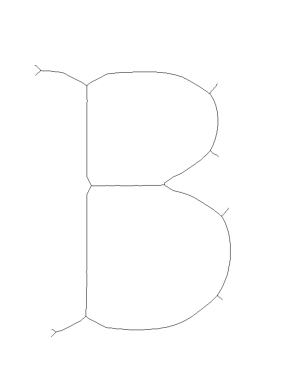

In [3]:
filename = 'B'
binary_image = cv.imread(f'{filename}.jpg', cv.IMREAD_GRAYSCALE)
_, binary_image = cv.threshold(binary_image, 128, 255, 0)
binary_image = gray_scale_to_binary(binary_image)
display_image(binary_image)

while not np.array_equal(binary_image, psi(binary_image)):
    IPython.display.clear_output(wait=True)
    display_image(psi(binary_image))
    binary_image = psi(binary_image)